# SC51_Reto_ValladaresCardenas_Santiago

## 2.	Descarga el archivo: reto.csv, utiliza los comandos adecuados para cargar el archivo de Excel.

In [ ]:
#Se cargan las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Se carga el archivo a reto 1
reto1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/reto_1.csv",  encoding='latin-1')
reto1

,Meses,Autobuses,Personal,Pasajeros,Kilómetros
0,Enero,660,368,4156,12.042894
1,Febrero,733,423,4152,12.134195
2,Marzo,756,405,4140,13.358546
3,Abril,674,354,4173,11.744912
4,Mayo,744,395,4180,13.405438
5,Junio,757,382,4191,12.858895
6,Julio,726,363,4277,13.041197
7,Agosto,711,353,4329,13.780331
8,Septiembre,773,403,4315,13.804009
9,Octubre,788,401,4350,15.432687


## 3.	Descarga la base de datos de reto_3.csv, genera una gráfica de caja de bigotes para hallar la mediana de los autobuses que tienen las entidades.

In [ ]:
#Se carga el archivo a reto3
reto3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/reto_3.csv",  encoding='latin-1')
reto3

,Entidad,Clase,Automovil,Autobus,Camioneta
0,Aguscalientes,1,10,446,11
1,Baja California,2,15,314,20
2,Campeche,3,13,150,214
3,Cohahuila,4,5,200,9
4,Colima,5,8,367,2
5,Chiapas,6,200,280,24
6,Chihuahua,7,35,207,109
7,Distrito Federal,8,2,240,18
8,Durango,9,556,165,50
9,Guanajuato,10,300,178,118


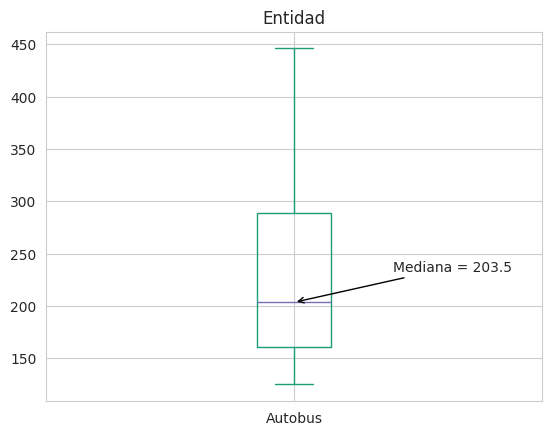

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

mediana = reto3["Autobus"].median()
reto3["Autobus"].plot.box(title="Entidad");
plt.annotate(f"Mediana = {mediana}", xy=(1,reto3["Autobus"].median()), xytext=(1.2, mediana+30), arrowprops={"arrowstyle":"->", "color":"black"});
plt.show()

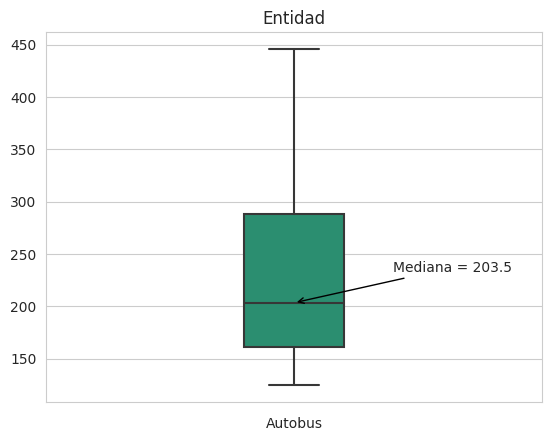

In [ ]:
sns.boxplot(data=reto3, y="Autobus", width=0.2)
plt.annotate(f"Mediana = {mediana}", xy=(0,reto3["Autobus"].median()), xytext=(0.2, mediana+30), arrowprops={"arrowstyle":"->", "color":"black"});
plt.ylabel("")
plt.xlabel("Autobus")
plt.title("Entidad")
plt.show()

## 4.	Elabora una gráfica en 3 dimensiones donde relacionarás las variables Automóvil, Autobús, y camioneta.

<function matplotlib.pyplot.show(close=None, block=None)>

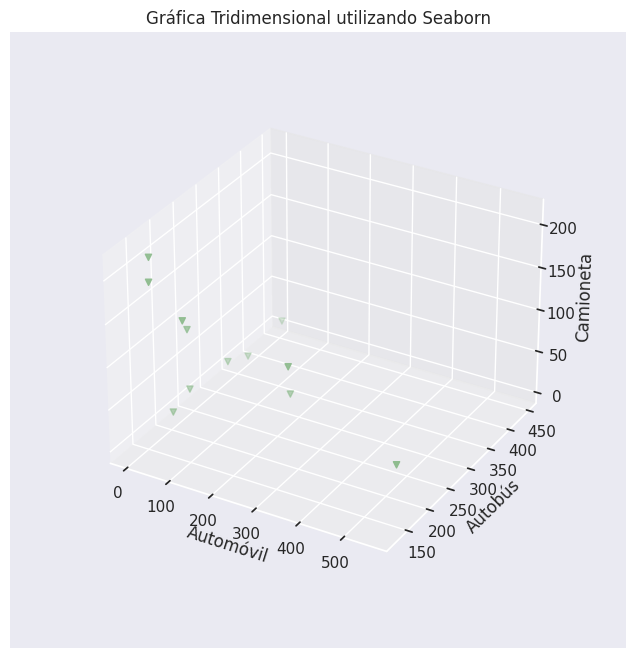

In [68]:
# se importa lo necesario para graficar en tres dimensiones
from mpl_toolkits.mplot3d import Axes3D

#Se realiza la gráfica
sns.set(palette="Set2")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = "3d")
x = reto3["Automovil"]
z = reto3["Camioneta"]
y = reto3["Autobus"]
ax.set_xlabel("Automóvil")
ax.set_zlabel("Camioneta")
ax.set_ylabel("Autobús")
plt.title("Gráfica Tridimensional utilizando Seaborn")
ax.scatter(x,y,z, color="darkseagreen", marker="v")
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show

## 5.	Construye una gráfica residual de las 3 variables, automóvil (variable dependiente) junto con autobús y camioneta. Las dos últimas son las variables independientes.

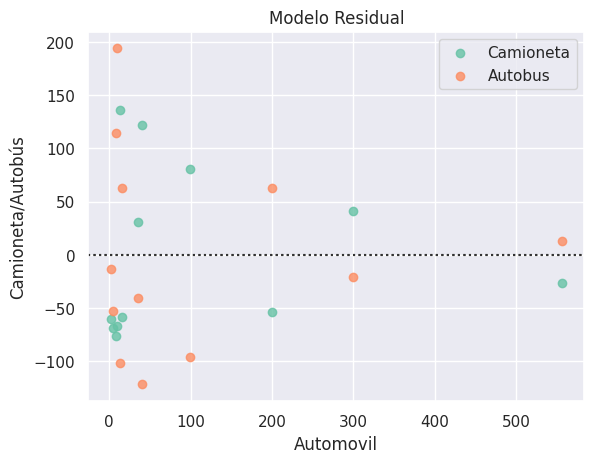

In [66]:
ax = sns.residplot(data=reto3, x="Automovil", y="Camioneta",label = "Camioneta")
sns.residplot(data=reto3, x="Automovil", y="Autobus", ax= ax, label = "Autobus")
plt.title("Modelo Residual")
plt.ylabel("Camioneta/Autobús")
plt.legend()

## 6.	Indica si existe alguna relación de ajuste entre la variable automóvil y autobuses.

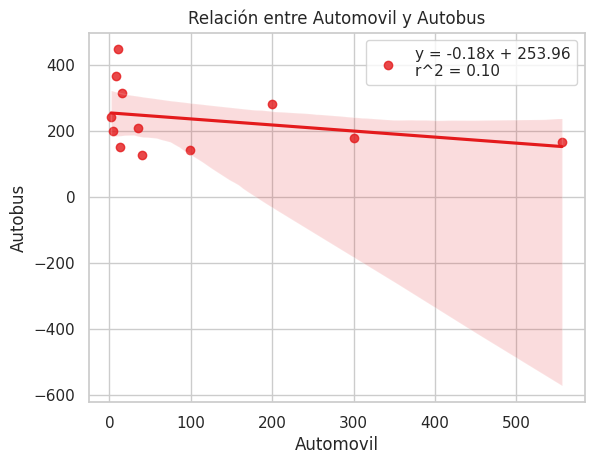

In [153]:
from scipy import stats

ecuacion = stats.linregress(x=reto3["Automovil"],y=reto3["Autobus"])
sns.set(palette="Set1", style="whitegrid")
sns.regplot(data=reto3, x="Automovil", y="Autobus", label = f"y = {ecuacion.slope:.2f}x + {ecuacion.intercept:.2f}\nr^2 = {ecuacion.rvalue**2:.2f}")
plt.legend()
plt.title("Relación entre Automovil y Autobus")
plt.show()

Debido a que el valor de la correlación de Pearson es tan baja (0.1) no creo que se pueda afirmar que existe una relación entre la variable automóvil y la variable Autobus

## 7.	Realiza una gráfica de kdeplot que muestre la relación entre los automóviles y el número de autobuses de las primeras 6 entidades.

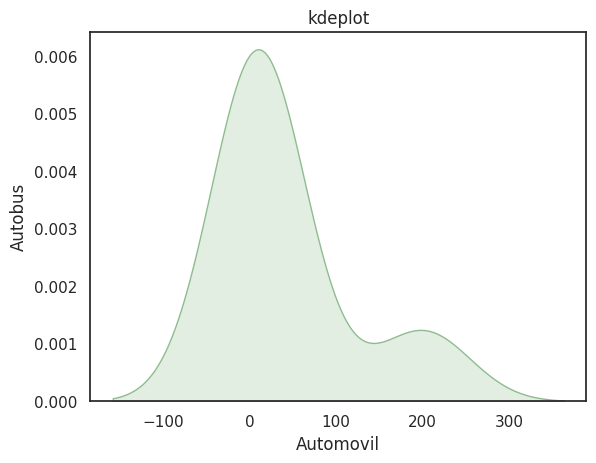

In [104]:
datoskdeplot = reto3.iloc[0:6]

sns.set(context="notebook", style="white")
sns.kdeplot(data=datoskdeplot, x="Automovil", fill=True, color="darkseagreen")
plt.title("kdeplot")
plt.ylabel("Autobus")
plt.show()

## 8.	Realiza un histograma que relacione el personal con el número de meses. Únicamente de enero a junio.

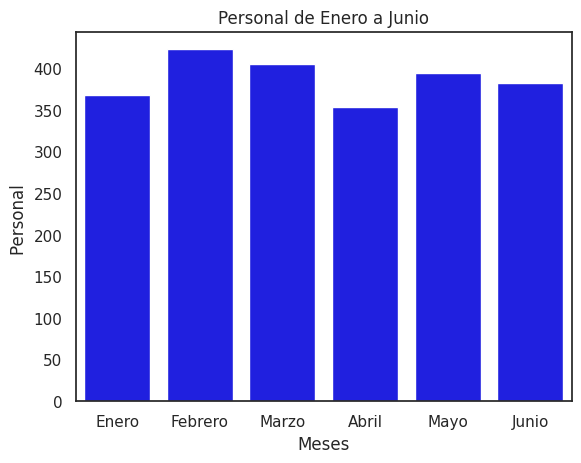

In [130]:
enero_junio = reto1.iloc[0:6]

sns.barplot(data=enero_junio, x="Meses", y="Personal ", color="blue")
plt.title("Personal de Enero a Junio")
plt.show()

## 9.	Realiza una gráfica de pastel que relacione los automóviles con las primeras 6 entidades de la tabla.

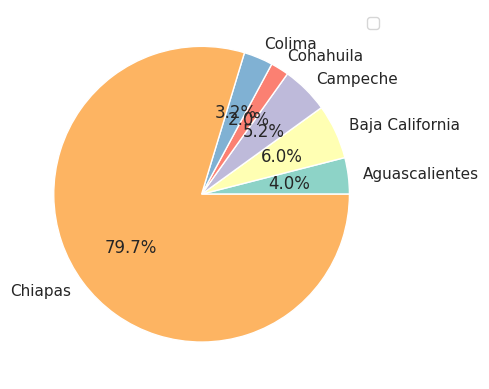

In [148]:
entidades_pastel = reto3.iloc[0:6]
# entidades_pastel.iloc[0,0]="Aguascalientes"

sns.set_palette("Set3")
entidades_pastel.plot.pie(y="Automovil", labels=entidades_pastel["Entidad"], autopct="%1.1f%%")
plt.legend("")
plt.ylabel("")
plt.show()

## 10.	De la base de datos obtén la gráfica de dispersión para la relación entre automóvil vs autobús e indica qué tipo de relación tienen los datos independientes.

<Axes: xlabel='Automovil', ylabel='Autobus'>

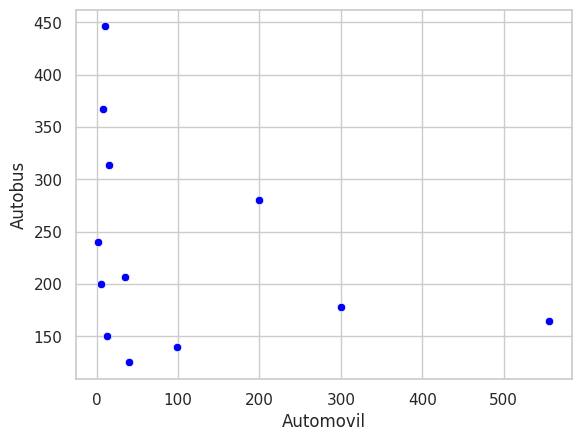

In [154]:
sns.set_style("whitegrid")
sns.scatterplot(data=reto3, x="Automovil", y="Autobus", color="blue")

Como se habia explicado previamente, opino que no existe una relación entre los datos ya que el valor de r^2 es igual a 0.1